In [299]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import klib

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


data = pd.read_csv('jfk-f-takeoff.csv')  # load our data

In [255]:
# Getting info about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [256]:
## checking for missing value in sum
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [304]:
L_Encoder = LabelEncoder()

for x in data.select_dtypes(["object_"]).columns:
    data[x] = L_Encoder.fit_transform(data[x]).astype("str")


In [307]:
# handling categorical variables

data = pd.get_dummies(data=data, drop_first=True) 

In [257]:
# check for unique values in Dew Point
data['Dew Point'].unique()

array(['34', '32', '33', '31', '30', '29', '67', '35', '36', '38', '39',
       '40', '41', '42', '28', '27', '46', '37', '44', '45', '52', '53',
       '54', '56', '57', '59', '58', '50', '43', '48', '49', '47', '21',
       '20', '22', '24', '23', '19', '18', '16', '13', '12', '14', '15',
       '17', '26', '25', '51', '55', '6\xa0', '9\xa0', '5\xa0', '8\xa0',
       '10', '4\xa0', '7\xa0', '3\xa0', '2\xa0', '11', '0\xa0', '-1',
       '1\xa0', '-2', '-3'], dtype=object)

In [258]:
# Remove "\xa0" from Dew Point data
data['Dew Point'] = data['Dew Point'].str.replace(u'\xa0', u'')

In [259]:
# check for unique values in Dew Point
data['Dew Point'].unique()

array(['34', '32', '33', '31', '30', '29', '67', '35', '36', '38', '39',
       '40', '41', '42', '28', '27', '46', '37', '44', '45', '52', '53',
       '54', '56', '57', '59', '58', '50', '43', '48', '49', '47', '21',
       '20', '22', '24', '23', '19', '18', '16', '13', '12', '14', '15',
       '17', '26', '25', '51', '55', '6', '9', '5', '8', '10', '4', '7',
       '3', '2', '11', '0', '-1', '1', '-2', '-3'], dtype=object)

In [260]:
# Convert data type to integer
data['Dew Point'] = data['Dew Point'].astype(int)

In [261]:
# EDA / Exploratory Data Analysis & Data Cleaning with klib
# Data cleaning function
# This function drops empty & single valued columns as well as empty & duplicate rows 
df_cleaned = klib.data_cleaning(data)

Shape of cleaned data: (28820, 23) - Remaining NAs: 2


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 3.79 MB (-76.57%)



In [262]:
print(df_cleaned.shape)
df_cleaned = df_cleaned.dropna(axis=0)
print(df_cleaned.shape)

(28820, 23)
(28818, 23)


C:\Users\idaen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\klib\describe.py:246: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method=method)


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

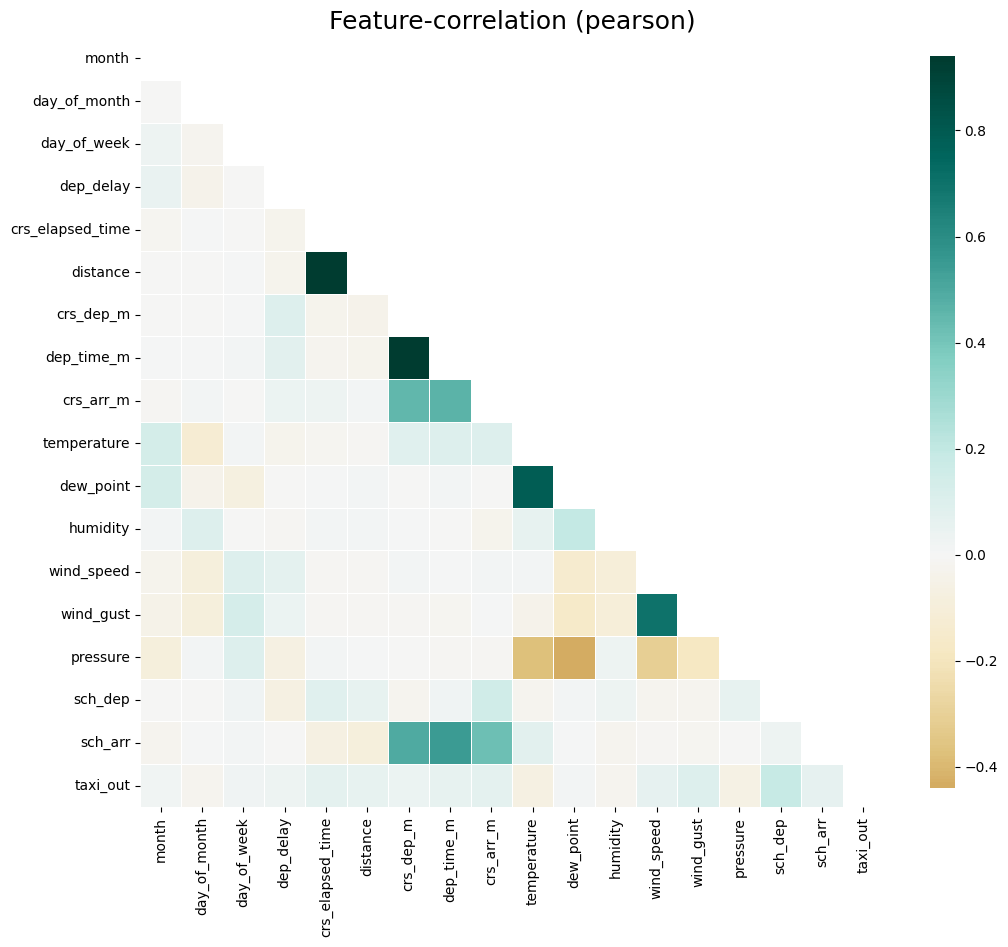

In [263]:
# Correlation plot
klib.corr_plot(df_cleaned, annot = False)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

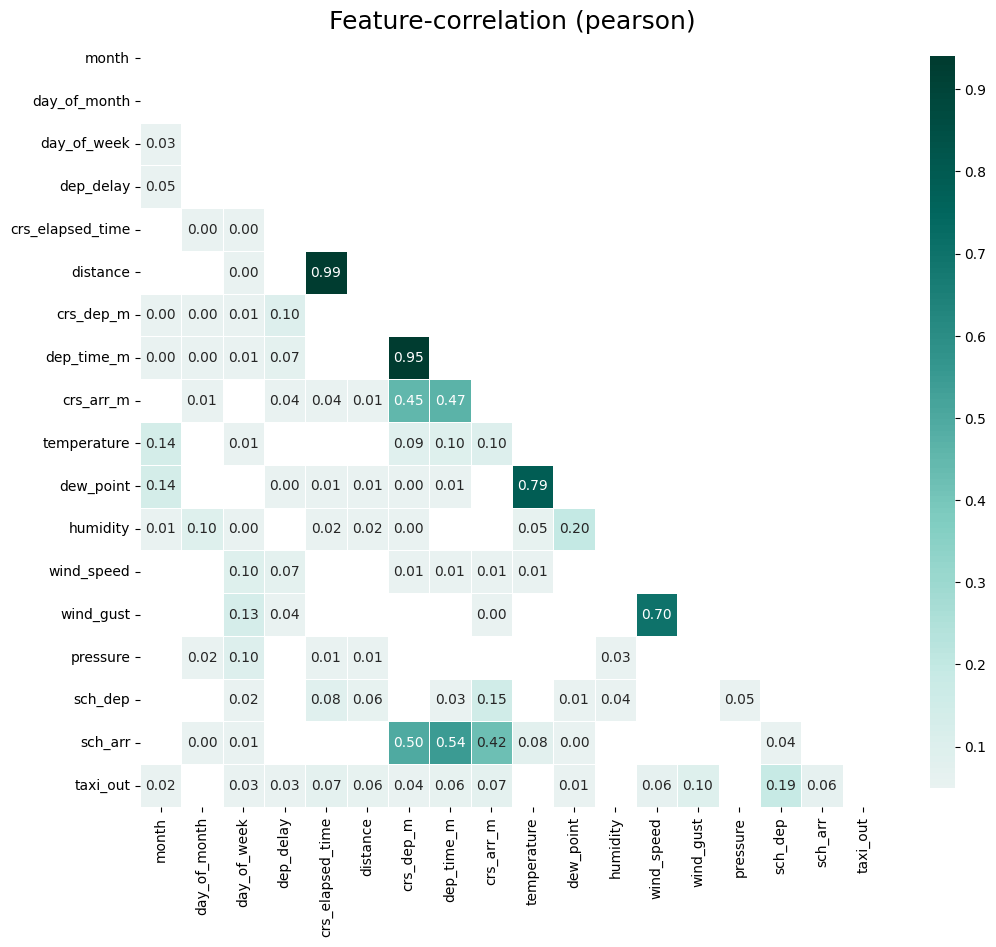

In [264]:
# Display only positive correlation.

klib.corr_plot(df_cleaned, split = "pos", annot = True)

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

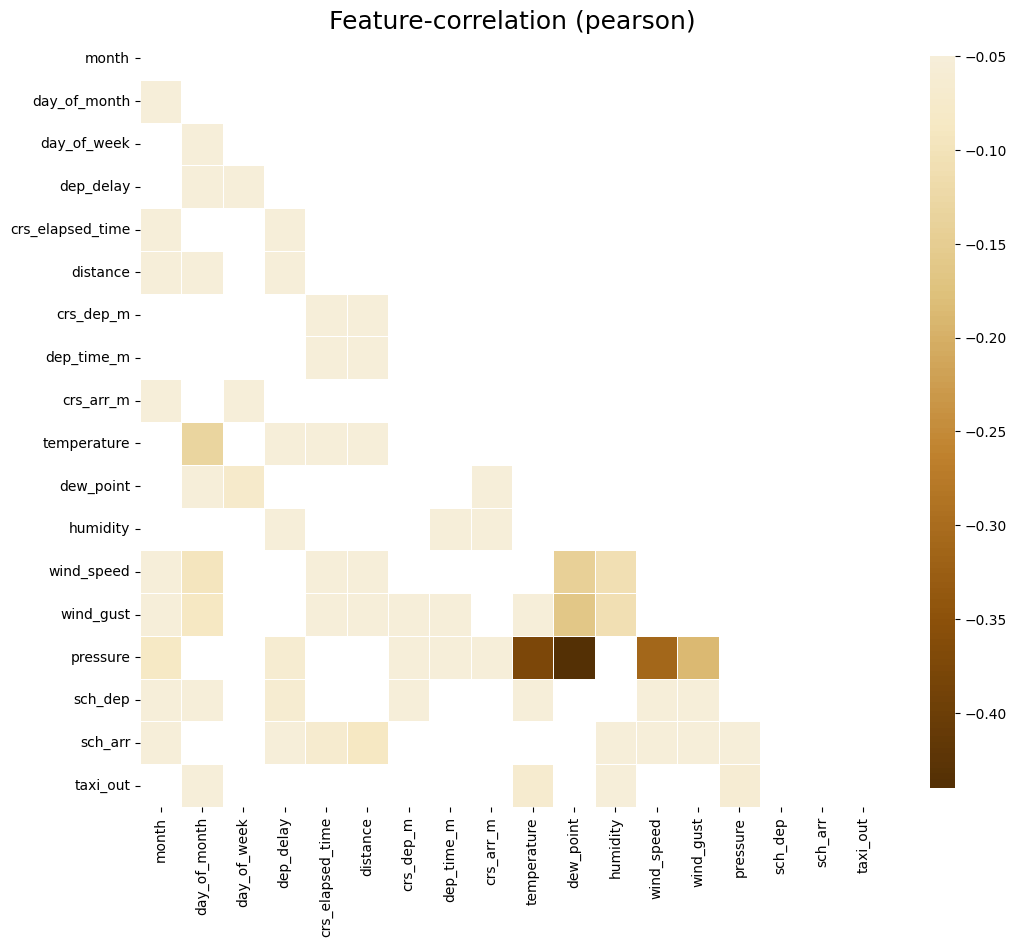

In [265]:
# Display only negative correlation.

klib.corr_plot(df_cleaned, split = "neg", annot = False)

C:\Users\idaen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\klib\describe.py:241: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pd.DataFrame(data.corrwith(target_data, method=method))


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

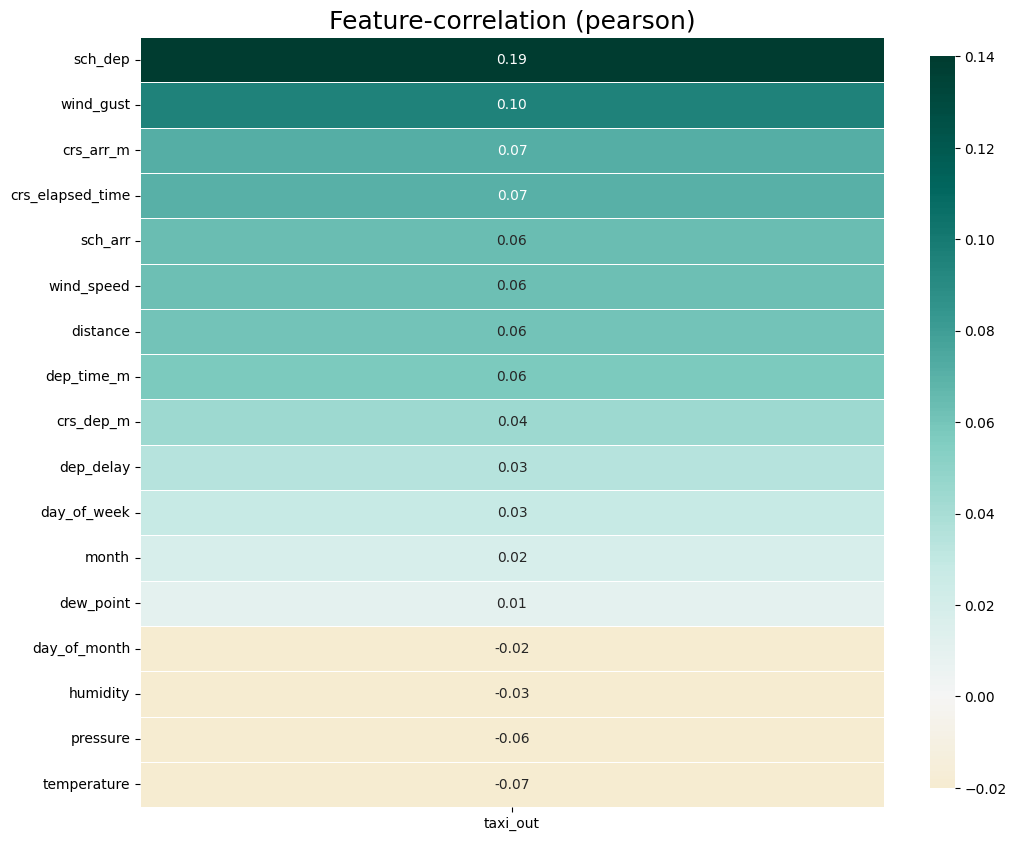

In [266]:
# Display correlation with a target variable of interest

klib.corr_plot(df_cleaned, target = "taxi_out")

In [267]:
# Display correlation data matrix to see real values

klib.corr_mat(df_cleaned)

C:\Users\idaen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\klib\describe.py:246: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method=method)


,month,day_of_month,day_of_week,dep_delay,crs_elapsed_time,distance,crs_dep_m,dep_time_m,crs_arr_m,temperature,dew_point,humidity,wind_speed,wind_gust,pressure,sch_dep,sch_arr,taxi_out
month,1.00,-0.01,0.03,0.05,-0.02,-0.00,0.00,0.00,-0.01,0.14,0.14,0.01,-0.03,-0.05,-0.09,-0.01,-0.02,0.02
day_of_month,-0.01,1.00,-0.03,-0.04,0.00,-0.00,0.00,0.00,0.01,-0.13,-0.04,0.10,-0.09,-0.09,0.02,-0.00,0.00,-0.02
day_of_week,0.03,-0.03,1.00,-0.01,0.00,0.00,0.01,0.01,-0.00,0.01,-0.07,0.00,0.10,0.13,0.10,0.02,0.01,0.03
dep_delay,0.05,-0.04,-0.01,1.00,-0.03,-0.03,0.10,0.07,0.04,-0.03,0.00,-0.01,0.07,0.04,-0.06,-0.07,-0.01,0.03
crs_elapsed_time,-0.02,0.00,0.00,-0.03,1.00,0.99,-0.03,-0.02,0.04,-0.02,0.01,0.02,-0.01,-0.01,0.01,0.08,-0.07,0.07
distance,-0.00,-0.00,0.00,-0.03,0.99,1.00,-0.04,-0.03,0.01,-0.01,0.01,0.02,-0.01,-0.01,0.01,0.06,-0.09,0.06
crs_dep_m,0.00,0.00,0.01,0.10,-0.03,-0.04,1.00,0.95,0.45,0.09,0.00,0.00,0.01,-0.01,-0.01,-0.03,0.50,0.04
dep_time_m,0.00,0.00,0.01,0.07,-0.02,-0.03,0.95,1.00,0.47,0.10,0.01,-0.01,0.01,-0.01,-0.01,0.03,0.54,0.06
crs_arr_m,-0.01,0.01,-0.00,0.04,0.04,0.01,0.45,0.47,1.00,0.10,-0.00,-0.03,0.01,0.00,-0.01,0.15,0.42,0.07
temperature,0.14,-0.13,0.01,-0.03,-0.02,-0.01,0.09,0.10,0.10,1.00,0.79,0.05,0.01,-0.04,-0.38,-0.02,0.08,-0.07


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot: xlabel='taxi_out', ylabel='Density'>

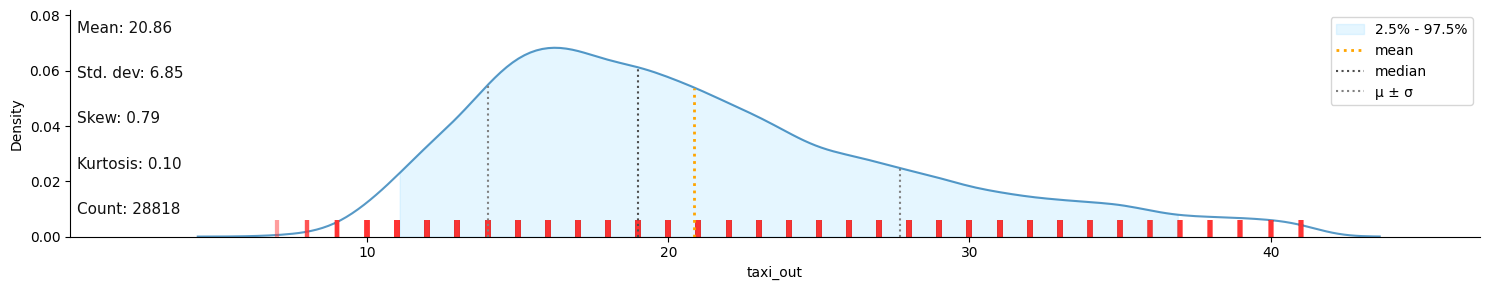

In [268]:
# Distribution plot
# Display the distribution plot for columns of interest

klib.dist_plot(df_cleaned["taxi_out"])

GridSpec(6, 5)

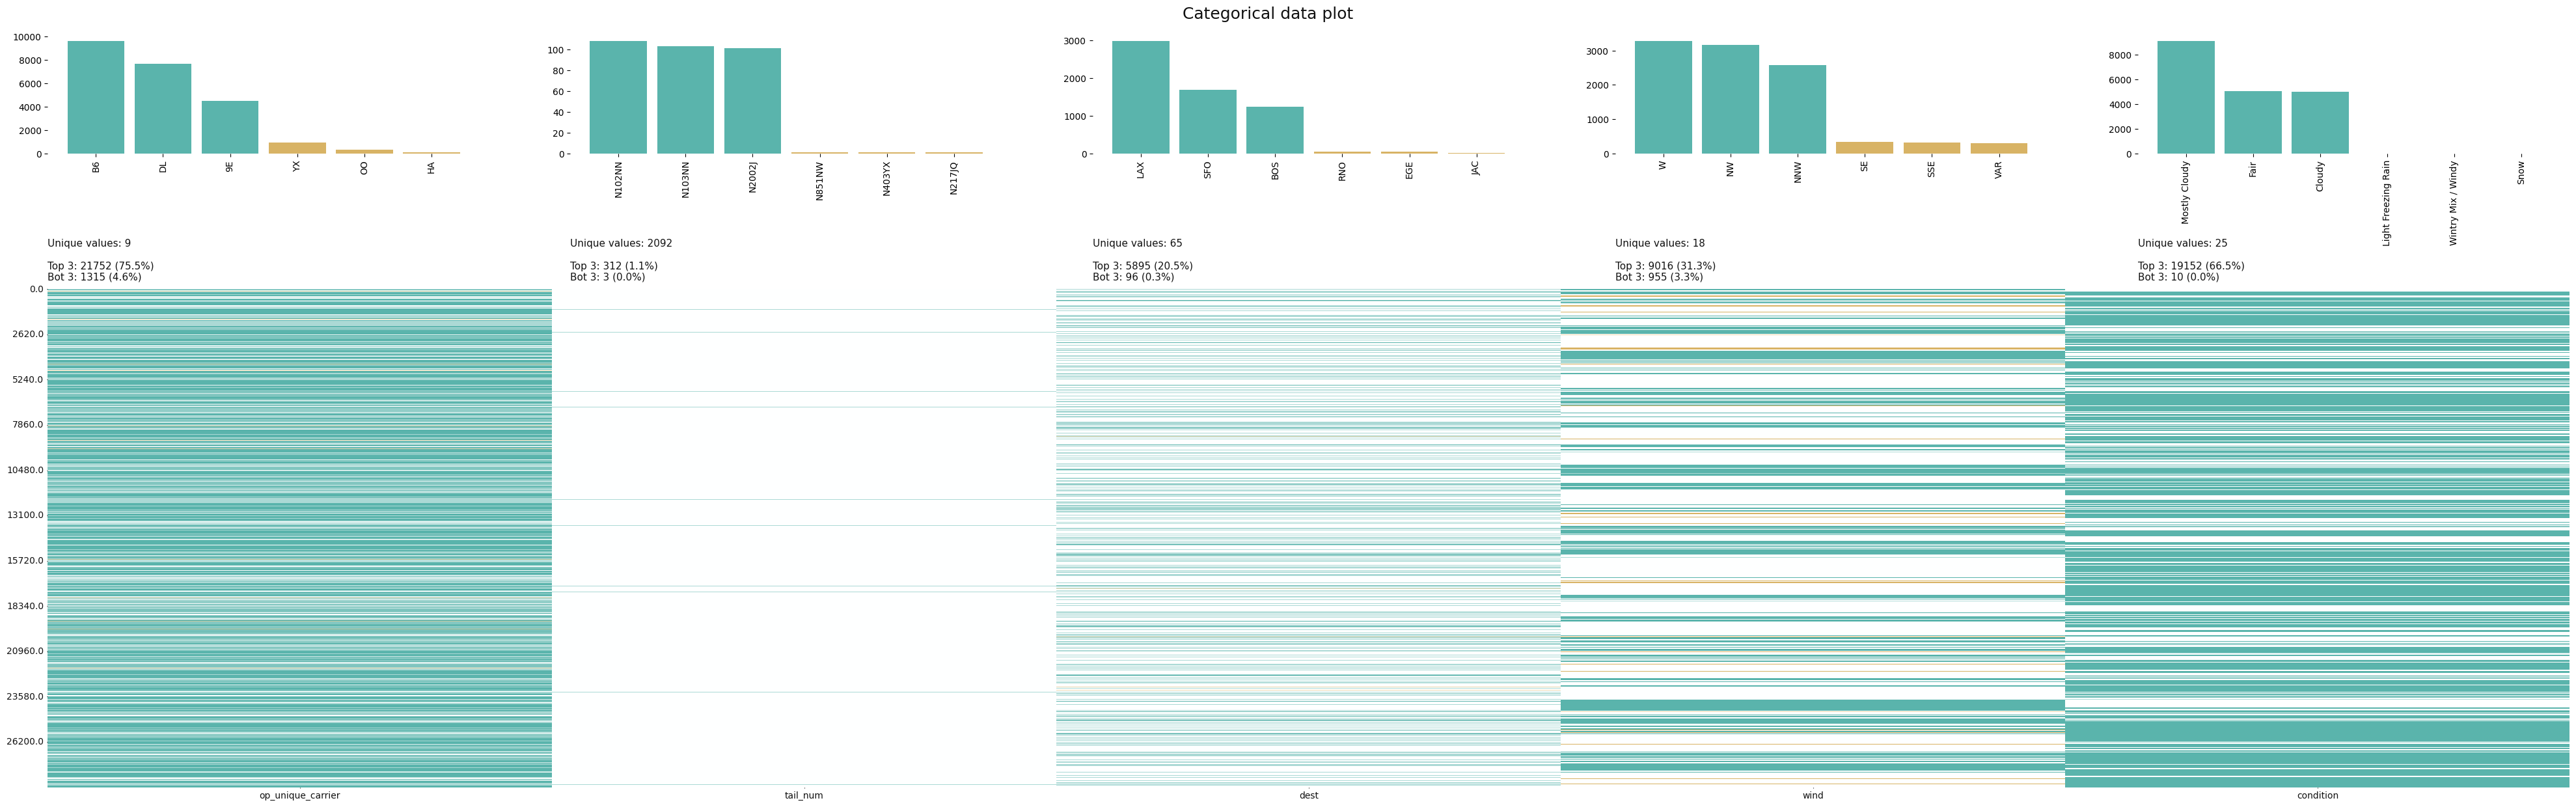

In [269]:
# Categorical Plot 
# Display categorical plots 

klib.cat_plot(df_cleaned, figsize = (50, 15))

In [270]:
# From EDA especially correlation analysis, it's proven that some columns are highly correlated with the target variable (Taxi_Out). 
# But not all variables are correlated with the target variable. 
# safe to also drop "wind" that contains NaN values because it is not correlated to "taxi_out"
# It's best to drop columns that are not correlated and only use the correlated variables to design sklearn regression model

new_df = df_cleaned.drop(['wind', 'op_unique_carrier', 'tail_num', 'dest', 'dew_point', 'condition'], axis=1)
new_df.head()

,month,day_of_month,day_of_week,dep_delay,crs_elapsed_time,distance,crs_dep_m,dep_time_m,crs_arr_m,temperature,humidity,wind_speed,wind_gust,pressure,sch_dep,sch_arr,taxi_out
0,11,1,5,-1,124,636,324,323,448,48,58,25,38,29.860001,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,58,25,38,29.860001,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,58,25,38,29.860001,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,58,25,38,29.860001,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,58,24,35,29.910000,9,17,13


In [271]:
# create X and Y data matrices
X = new_df.drop(['taxi_out'], axis=1)
X

,month,day_of_month,day_of_week,dep_delay,crs_elapsed_time,distance,crs_dep_m,dep_time_m,crs_arr_m,temperature,humidity,wind_speed,wind_gust,pressure,sch_dep,sch_arr
0,11,1,5,-1,124,636,324,323,448,48,58,25,38,29.860001,9,17
1,11,1,5,-7,371,2475,340,333,531,48,58,25,38,29.860001,9,17
2,11,1,5,40,181,1069,301,341,482,48,58,25,38,29.860001,9,17
3,11,1,5,-2,168,944,345,343,513,48,58,25,38,29.860001,9,17
4,11,1,5,-4,139,760,360,356,499,46,58,24,35,29.910000,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1370,1372,1427,39,96,6,0,30.180000,20,32
28816,1,31,5,2,75,187,1390,1392,25,39,96,6,0,30.180000,19,23
28817,1,31,5,283,392,2422,1125,1408,1337,39,96,6,0,30.180000,19,23
28818,1,31,5,5,224,1598,1417,1422,261,39,96,6,0,30.180000,19,23


In [272]:
y = new_df.taxi_out
y

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: taxi_out, Length: 28818, dtype: int8

In [273]:
#Perform 80/20 data split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [274]:
# Data dimension
X_train.shape, y_train.shape

((23054, 16), (23054,))

In [275]:
X_test.shape, y_test.shape

((5764, 16), (5764,))

In [276]:
# Scaling the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # fitting the scaler to the training data
X_test = sc.transform(X_test) # transforming the test data

In [277]:
# Defines the regression model

model = linear_model.LinearRegression()

# to change model, just change model = 'WHATEVER MODEL WE WANT" lets test below
# model = linear_model.LinearRegression(kernel='poly')

In [278]:
# Build training model

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Actual value vs predicted value
act_pred = pd.DataFrame({"Actual value": y_test, "Predicted value": pred})
act_pred

,Actual value,Predicted value
3668,17,20.124002
11512,16,19.441807
24387,12,17.531199
1872,18,19.300287
6666,18,23.011589
...,...,...
15173,14,16.488182
1724,13,18.534464
183,20,19.853294
16133,32,21.046200


In [279]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.06217984861622561


In [306]:
# Prediction result
# Print model performance

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Coefficients: [ 2.5928292e-01 -2.1780968e-01  1.7376073e-01  2.5603092e-01
  4.1870875e+00 -3.7763689e+00 -4.1087298e-03  1.7661768e-01
  3.1399913e-03 -7.2413576e-01 -8.7925412e-02 -2.5947234e-01
  7.0035040e-01 -6.9896096e-01  1.2124164e+00  3.3584103e-01]
Intercept: 20.873384
Mean squared error (MSE): 33.47
Coefficient of determination (R^2): 0.28


In [281]:
r2_score(y_test, y_pred)

0.06217984861622561

In [282]:
r2_score(y_test, y_pred).dtype
# that's why we use modulo operator to format the numbers by rounding it off

dtype('float64')

In [283]:
# Make scatter plot

y_test

3668     17
11512    16
24387    12
1872     18
6666     18
         ..
15173    14
1724     13
183      20
16133    32
4707     17
Name: taxi_out, Length: 5764, dtype: int8

In [284]:
np.array(y_test)

array([17, 16, 12, ..., 20, 32, 17], dtype=int8)

In [285]:
y_pred

array([20.124002, 19.441807, 17.531199, ..., 19.853294, 21.0462  ,
       20.372993], dtype=float32)

C:\Users\idaen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='taxi_out'>

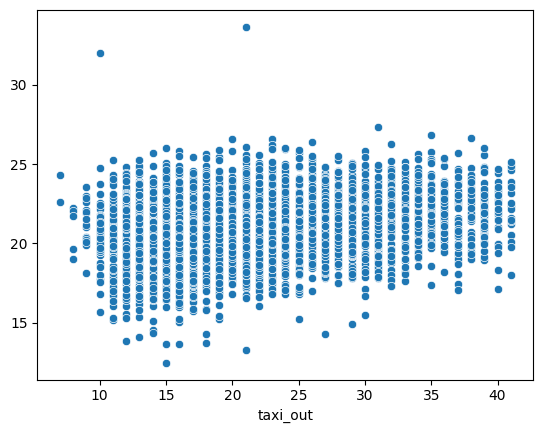

In [286]:
sns.scatterplot(y_test, y_pred)

C:\Users\idaen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='taxi_out'>

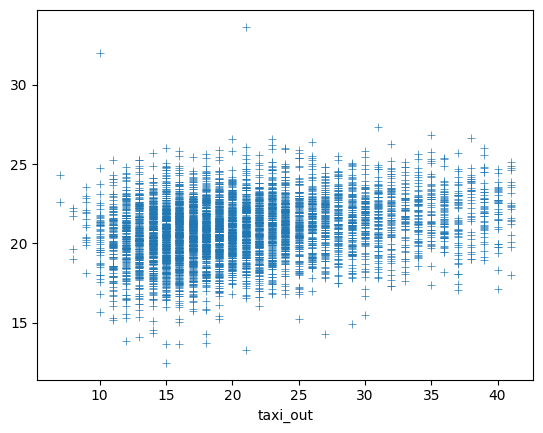

In [287]:
sns.scatterplot(y_test, y_pred, marker = '+')

C:\Users\idaen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='taxi_out'>

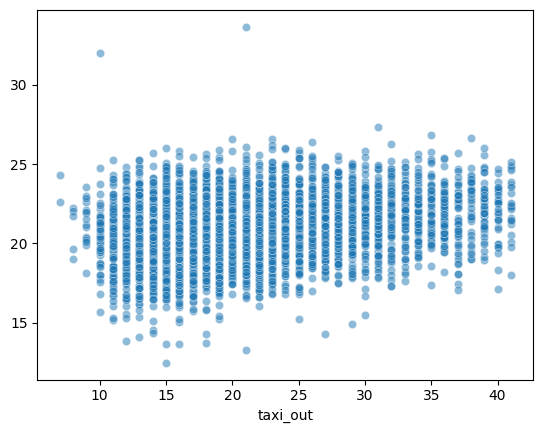

In [288]:
sns.scatterplot(y_test, y_pred, alpha = 0.5)

In [289]:
# Perform ridge regression
ridgeReg = Ridge(alpha=0.05, normalize = True) # setting the regularisation parameter
ridgeReg.fit(X_train, y_train)
y_pred = ridgeReg.predict(X_test)

# Checking accuracy

print('Coefficients:', ridgeReg.coef_)
print('Intercept:', ridgeReg.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))


Coefficients: [ 0.19350946 -0.18810529  0.15901613  0.25298297  0.5628252  -0.16314809
 -0.01488569  0.16607065  0.08602533 -0.6865534  -0.08114123 -0.18425167
  0.6223868  -0.63100475  1.223255    0.3658665 ]
Intercept: 20.873384
Mean squared error (MSE): 43.76
Coefficient of determination (R^2): 0.06


C:\Users\idaen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [290]:
# Perform lasso regression
lassoReg = Lasso(alpha=0.05, normalize = True) # setting the regularisation parameter
lassoReg.fit(X_train, y_train)
y_pred = lassoReg.predict(X_test)

# Checking accuracy

print('Coefficients:', lassoReg.coef_)
print('Intercept:', lassoReg.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Coefficients: [ 0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.]
Intercept: 20.873384
Mean squared error (MSE): 46.64
Coefficient of determination (R^2): -0.00


C:\Users\idaen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [296]:
# Perform Random Forest regression
RandomForest = RandomForestRegressor(n_estimators=100, random_state = 0) # setting the regularisation parameter
RandomForest.fit(X_train, y_train)
y_pred = RandomForest.predict(X_test)

# Checking accuracy

print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error (MSE): 33.47
Coefficient of determination (R^2): 0.28


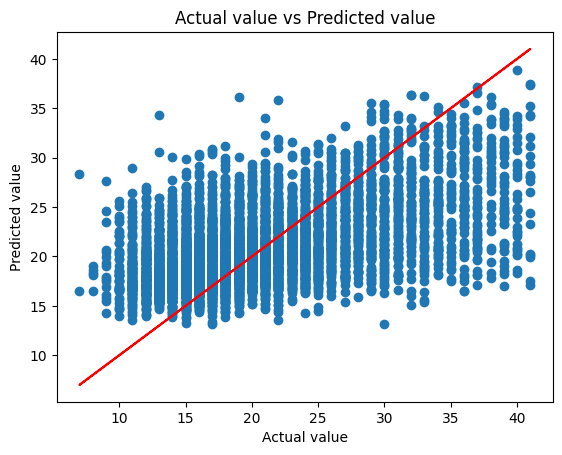

In [297]:
#Plot actual value vs predicted value
plt.scatter(y_test, y_pred)

plt.plot(y_test, y_test, color='red')

plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual value vs Predicted value")
plt.show()

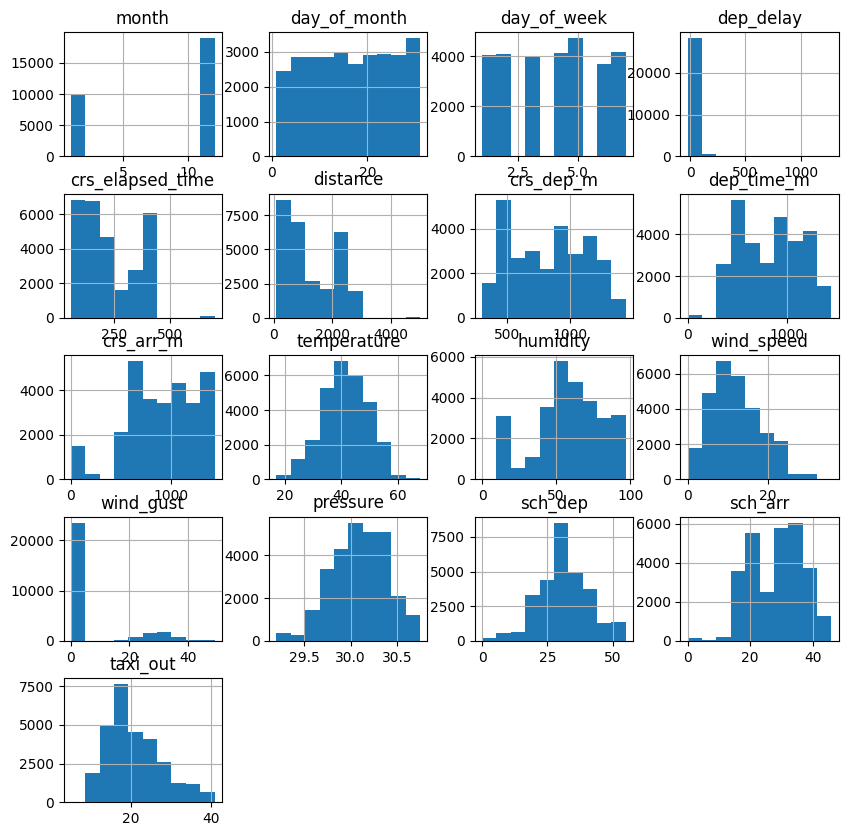

In [308]:
new_df.hist(bins=10, figsize=(10,10))
plt.show()

In [315]:
# Numerical columns
df_num = new_df.loc[:, new_df.dtypes != np.object]
df_num.shape

C:\Users\idaen\AppData\Local\Temp\ipykernel_18104\1402811983.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_num = new_df.loc[:, new_df.dtypes != np.object]


(28818, 17)

In [318]:
# Categorical columns
df_cat = data.loc[:, data.dtypes == np.object]
df_cat.shape

C:\Users\idaen\AppData\Local\Temp\ipykernel_18104\4241342247.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = data.loc[:, data.dtypes == np.object]


(28820, 0)

In [312]:
# Further tuning / testing models to get the best model
# Note: I am recovering from covid now & feels I think to submit this first for now, then revisit this nfurther tuning stage

def crossVal_model(numerical_features, categorical_features, estimator, X_train, y_train):
    #preprocessing
    numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
    categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder (handle_unknown = "ignore"))

    preprocessor = make_column_transformer((numerical_pipeline, numerical_features), (categorical_pipeline, categorical_features))

    #model
    model = make_pipeline(preprocessor, estimator)

    #cross validation
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)

    rmse = mean_squared_error(y_train, y_pred, squared=True)
    mse = mean_squared_error(y_train, y_pred, squared=False)
    mxe = max_error(y_train, y_pred)

    print('model : ',estimator.__class__.__name__)
    print('rmse = {:.2f}'.format(rmse))
    print('mse = {:.2f}'.format(mse))
    print('max error = {:.2f}'.format(mxe))
    
    #plots

    plt.scatter(y_pred)
    plt.xlabel('true')
    plt.ylabel('pred')
    plt.show();


C:\Users\idaen\AppData\Local\Temp\ipykernel_18104\2913695359.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_num = data.loc[:, data.dtypes != np.object]
